# WeatherPy

In [ ]:
!pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

Call current weather data for ONE location: <br>
api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

In [3]:
# Check if URL and API key works for the city of London...
test_url = f'http://api.openweathermap.org/data/2.5/weather?q=london&appid={weather_api_key}'
test_response = requests.get(test_url)
print(test_response)

<Response [200]>


In [4]:
# Check json format
test_response.json()

{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 274.91,
  'feels_like': 271.2,
  'temp_min': 273.15,
  'temp_max': 276.15,
  'pressure': 1029,
  'humidity': 60},
 'visibility': 10000,
 'wind': {'speed': 1.54, 'deg': 350},
 'clouds': {'all': 90},
 'dt': 1615103086,
 'sys': {'type': 1,
  'id': 1414,
  'country': 'GB',
  'sunrise': 1615098752,
  'sunset': 1615139446},
 'timezone': 0,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

In [6]:
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [7]:
# set up lists to hold reponse info
name = []
lat = []
lng = []
temp_max = []
humidity = []
clouds = []
wind_speed = []
country = []
dt = []

# log count
count = 0
set_count = 1

In [8]:
print('''
Beginning Data Retrieval
------------------------------------------------
''')

# Loop through the list of cities and perform a request for data
# Handle exceptions for a city that is not available in the WeatherMap API
for city in cities:
    
    response = requests.get(query_url + city).json()
    try:
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        dt.append(response['dt'])
             
        count += 1
        print(f'Processing Record {count} | {city}')

    except:
        print(f'{city} not found. Skipping...')
        pass

print('''
------------------------------------------------
Data Retrieval Complete
------------------------------------------------
''')


Beginning Data Retrieval
------------------------------------------------

Processing Record 1 | ushuaia
Processing Record 2 | ahuimanu
Processing Record 3 | albany
Processing Record 4 | tuktoyaktuk
Processing Record 5 | punta arenas
umzimvubu not found. Skipping...
Processing Record 6 | bredasdorp
Processing Record 7 | bengkulu
Processing Record 8 | hithadhoo
Processing Record 9 | castro
Processing Record 10 | duku
Processing Record 11 | aksu
Processing Record 12 | tchollire
barbar not found. Skipping...
Processing Record 13 | kieta
Processing Record 14 | atar
Processing Record 15 | weihai
Processing Record 16 | bluff
Processing Record 17 | saint-philippe
Processing Record 18 | saskylakh
Processing Record 19 | butaritari
Processing Record 20 | kirensk
Processing Record 21 | hobart
taolanaro not found. Skipping...
Processing Record 22 | ulaanbaatar
Processing Record 23 | dzerzhinskoye
Processing Record 24 | nishihara
Processing Record 25 | panambi
Processing Record 26 | yellowknife
Pr

Processing Record 235 | kopavogur
Processing Record 236 | sisimiut
katha not found. Skipping...
Processing Record 237 | vanavara
Processing Record 238 | bilibino
mergui not found. Skipping...
Processing Record 239 | lucapa
Processing Record 240 | hamamatsu
Processing Record 241 | zabid
Processing Record 242 | dingle
Processing Record 243 | dicabisagan
Processing Record 244 | bethel
Processing Record 245 | alihe
Processing Record 246 | iskateley
Processing Record 247 | aldama
Processing Record 248 | umm kaddadah
Processing Record 249 | bairiki
Processing Record 250 | labuhan
Processing Record 251 | nome
Processing Record 252 | hofn
Processing Record 253 | nieuw amsterdam
Processing Record 254 | avera
Processing Record 255 | ulkan
Processing Record 256 | port lincoln
Processing Record 257 | geraldton
Processing Record 258 | caravelas
Processing Record 259 | coihaique
Processing Record 260 | ahipara
Processing Record 261 | vanino
Processing Record 262 | hovd
Processing Record 263 | narsaq

Processing Record 460 | gunjur
Processing Record 461 | muros
Processing Record 462 | pontianak
Processing Record 463 | samalkot
Processing Record 464 | yarkovo
Processing Record 465 | finnsnes
temaraia not found. Skipping...
Processing Record 466 | hokitika
fort saint john not found. Skipping...
Processing Record 467 | pecos
Processing Record 468 | akyab
Processing Record 469 | diamantino
Processing Record 470 | maroantsetra
Processing Record 471 | ha giang
Processing Record 472 | yulara
Processing Record 473 | mackenzie
Processing Record 474 | santiago del estero
Processing Record 475 | san carlos de bariloche
Processing Record 476 | yarim
Processing Record 477 | camalu
Processing Record 478 | tazovskiy
Processing Record 479 | naze
Processing Record 480 | garni
Processing Record 481 | alta floresta
Processing Record 482 | vermilion
Processing Record 483 | bereda
Processing Record 484 | kashi
Processing Record 485 | gazojak
felidhoo not found. Skipping...
Processing Record 486 | golden

## Convert Raw Data to DataFrame

Export the city data into a .csv
Display the DataFrame <br>

In [9]:
weather_dict = {
    "City": name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": dt
}
weather_data = pd.DataFrame(weather_dict)

In [10]:
weather_data.to_csv("./output_data/cities.csv", encoding="utf-8", index=False, header=True)

In [11]:
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,9.00,53,40,8.23,AR,1615102861
1,‘Āhuimanu,21.4447,-157.8378,23.00,68,40,6.17,US,1615103229
2,Albany,42.6001,-73.9662,-5.56,79,67,0.45,US,1615102942
3,Tuktoyaktuk,69.4541,-133.0374,-25.95,90,100,6.14,CA,1615102945
4,Punta Arenas,-53.1500,-70.9167,7.00,65,75,3.60,CL,1615102946
...,...,...,...,...,...,...,...,...,...
540,Dalvik,65.9702,-18.5286,-1.00,86,0,3.09,IS,1615103349
541,Baymak,52.5933,58.3225,-7.03,96,100,5.17,RU,1615103349
542,Kushiro,42.9750,144.3747,-2.00,59,20,4.63,JP,1615103349
543,Berbera,10.4396,45.0143,27.03,45,100,3.18,SO,1615103349


In [12]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,21.015938,22.079634,11.635835,70.458716,50.388991,3.689596,1.615103e+09
std,33.330003,90.310343,16.344135,22.492700,40.568151,2.470980,1.435004e+02
min,-54.800000,-175.200000,-31.520000,4.000000,0.000000,0.040000,1.615103e+09
25%,-4.215300,-59.516700,0.570000,59.000000,1.000000,1.840000,1.615103e+09
50%,25.500000,26.687600,15.560000,76.000000,47.000000,3.160000,1.615103e+09
75%,50.096900,99.825000,25.000000,88.000000,95.000000,5.140000,1.615103e+09
max,78.218600,179.316700,37.990000,100.000000,100.000000,13.890000,1.615103e+09


## Inspect the data and remove the cities where the humidity > 100%.

Skip this step if there are no cities that have humidity > 100%.

In [19]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,21.015938,22.079634,11.635835,70.458716,50.388991,3.689596,1.615103e+09
std,33.330003,90.310343,16.344135,22.492700,40.568151,2.470980,1.435004e+02
min,-54.800000,-175.200000,-31.520000,4.000000,0.000000,0.040000,1.615103e+09
25%,-4.215300,-59.516700,0.570000,59.000000,1.000000,1.840000,1.615103e+09
50%,25.500000,26.687600,15.560000,76.000000,47.000000,3.160000,1.615103e+09
75%,50.096900,99.825000,25.000000,88.000000,95.000000,5.140000,1.615103e+09
max,78.218600,179.316700,37.990000,100.000000,100.000000,13.890000,1.615103e+09


#### Max humidity result from the summary statistics shows 100%

In [21]:
# double check max value of humidity from the weather_data
weather_data['Humidity'].max()

100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

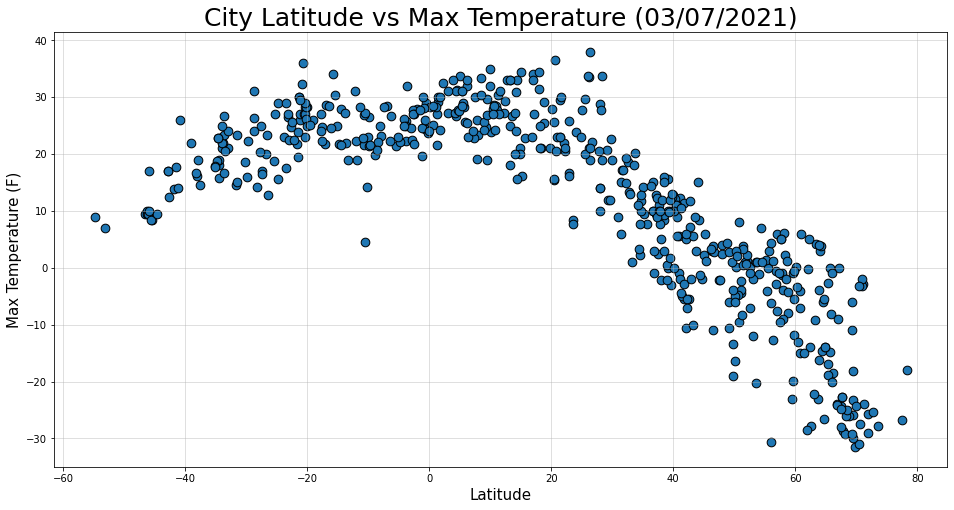

In [56]:
x_values = weather_data['Lat']
y_values = weather_data['Max Temp']
plt.figure(figsize=(16,8))
plt.scatter(x_values,y_values, edgecolors='black', s=75)
plt.xlabel('Latitude', size=15)
plt.ylabel('Max Temperature (F)', size=15)
plt.title('City Latitude vs Max Temperature (03/07/2021)', size=25)
plt.grid(b=True, alpha=.5)
plt.show()

### Latitude vs. Humidity Plot

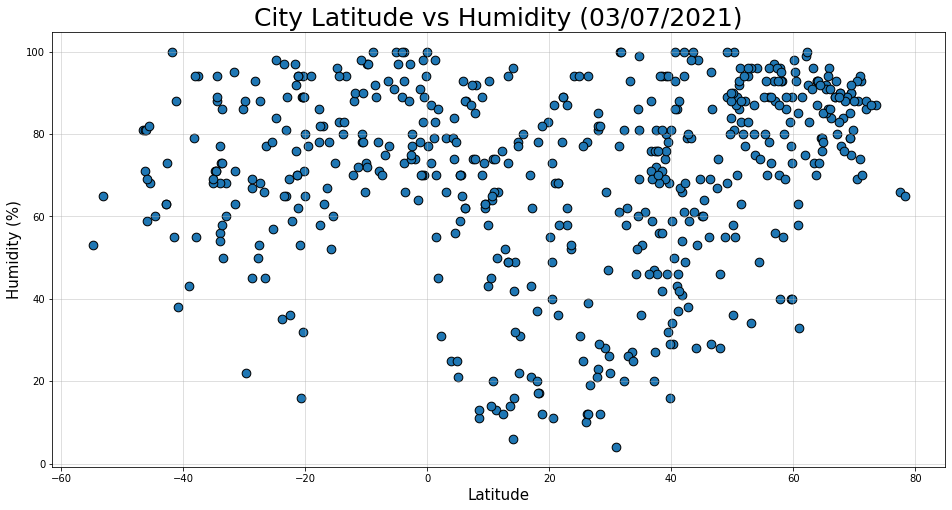

In [57]:
x_values = weather_data['Lat']
y_values = weather_data['Humidity']
plt.figure(figsize=(16,8))
plt.scatter(x_values,y_values, edgecolors='black', s=75)
plt.xlabel('Latitude', size=15)
plt.ylabel('Humidity (%)', size=15)
plt.title('City Latitude vs Humidity (03/07/2021)', size=25)
plt.grid(b=True, alpha=.5)
plt.show()

### Latitude vs. Cloudiness Plot

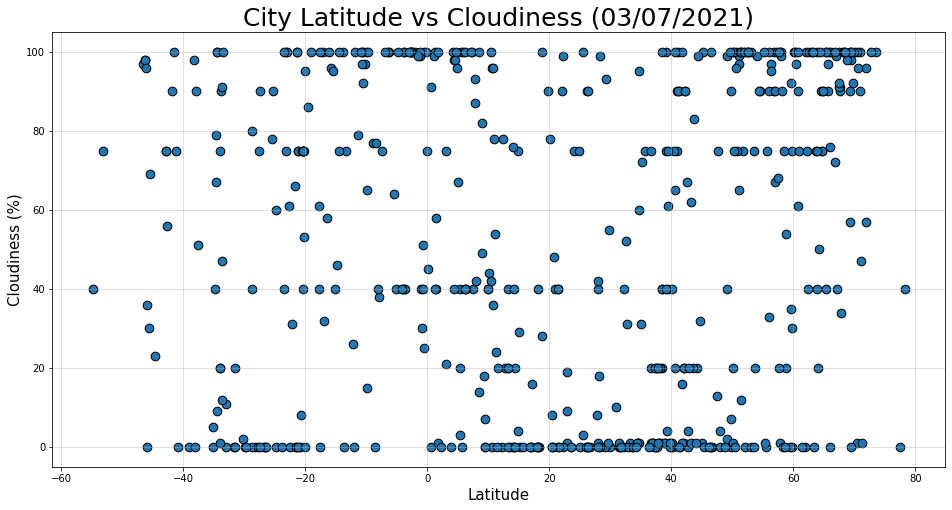

In [58]:
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']
plt.figure(figsize=(16,8))
plt.scatter(x_values,y_values, edgecolors='black', s=75)
plt.xlabel('Latitude', size=15)
plt.ylabel('Cloudiness (%)', size=15)
plt.title('City Latitude vs Cloudiness (03/07/2021)', size=25)
plt.grid(b=True, alpha=.5)
plt.show()

### Latitude vs. Wind Speed Plot

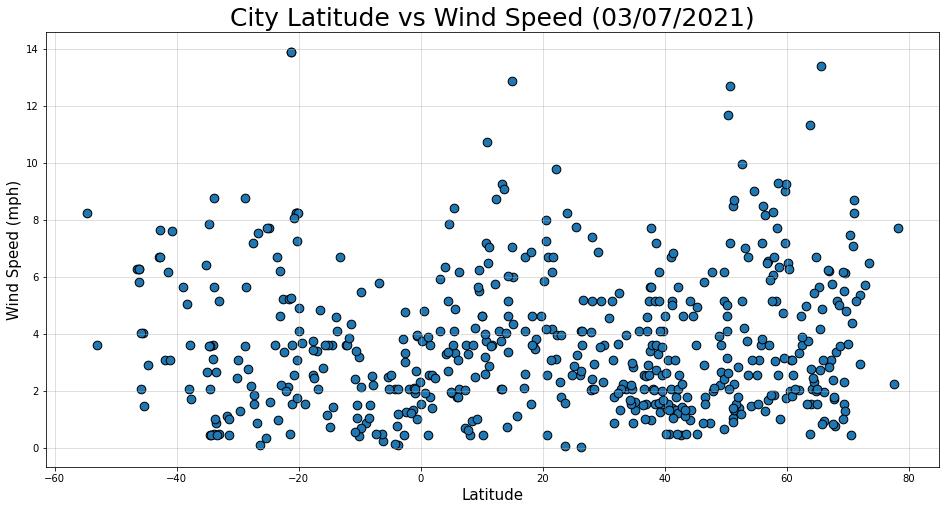

In [59]:
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']
plt.figure(figsize=(16,8))
plt.scatter(x_values,y_values, edgecolors='black', s=75)
plt.xlabel('Latitude', size=15)
plt.ylabel('Wind Speed (mph)', size=15)
plt.title('City Latitude vs Wind Speed (03/07/2021)', size=25)
plt.grid(b=True, alpha=.5)
plt.show()

## Linear Regression

### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [63]:
NHemisphere = weather_data.loc[weather_data['Lat'] > 0]

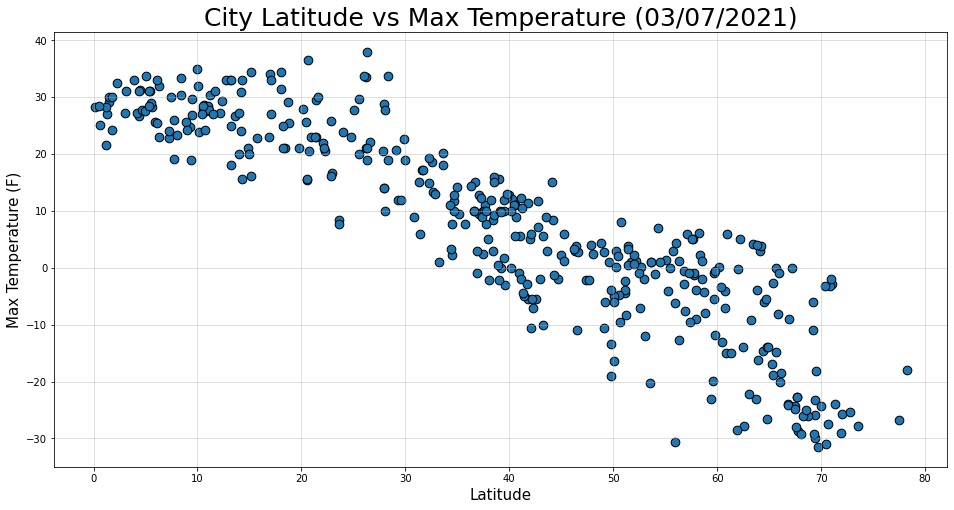

In [64]:
x_values = NHemisphere['Lat']
y_values = NHemisphere['Max Temp']
plt.figure(figsize=(16,8))
plt.scatter(x_values,y_values, edgecolors='black', s=75)
plt.xlabel('Latitude', size=15)
plt.ylabel('Max Temperature (F)', size=15)
plt.title('City Latitude vs Max Temperature (03/07/2021)', size=25)
plt.grid(b=True, alpha=.5)
plt.show()

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [68]:
SHemisphere = weather_data.loc[weather_data['Lat'] < 0]

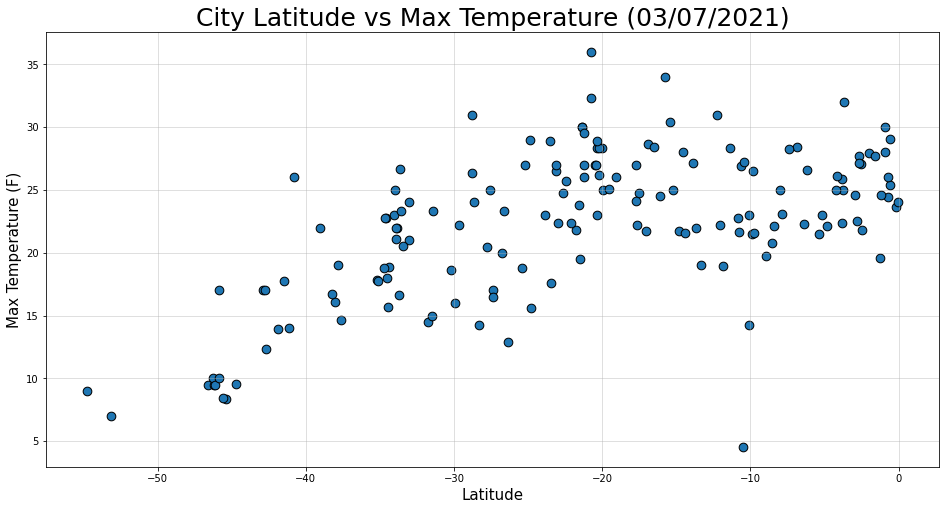

In [69]:
x_values = SHemisphere['Lat']
y_values = SHemisphere['Max Temp']
plt.figure(figsize=(16,8))
plt.scatter(x_values,y_values, edgecolors='black', s=75)
plt.xlabel('Latitude', size=15)
plt.ylabel('Max Temperature (F)', size=15)
plt.title('City Latitude vs Max Temperature (03/07/2021)', size=25)
plt.grid(b=True, alpha=.5)
plt.show()

### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

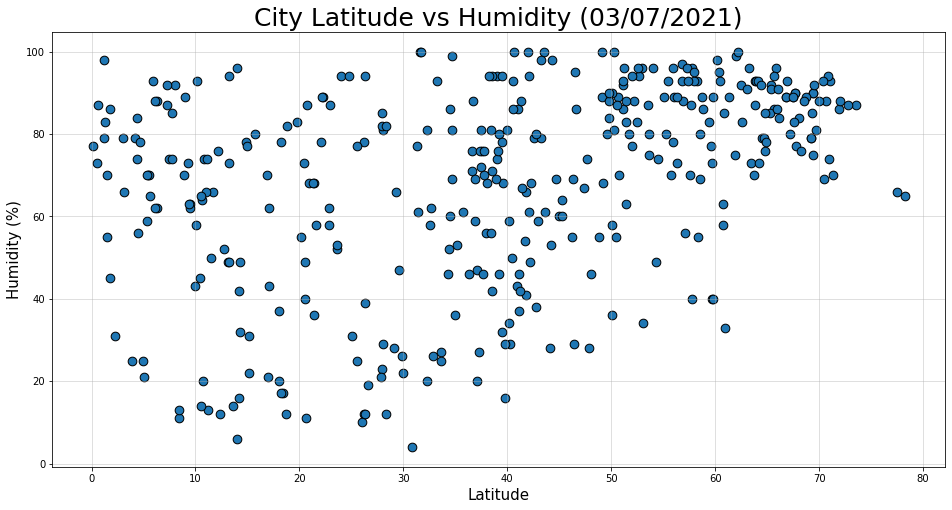

In [70]:
x_values = NHemisphere['Lat']
y_values = NHemisphere['Humidity']
plt.figure(figsize=(16,8))
plt.scatter(x_values,y_values, edgecolors='black', s=75)
plt.xlabel('Latitude', size=15)
plt.ylabel('Humidity (%)', size=15)
plt.title('City Latitude vs Humidity (03/07/2021)', size=25)
plt.grid(b=True, alpha=.5)
plt.show()

### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

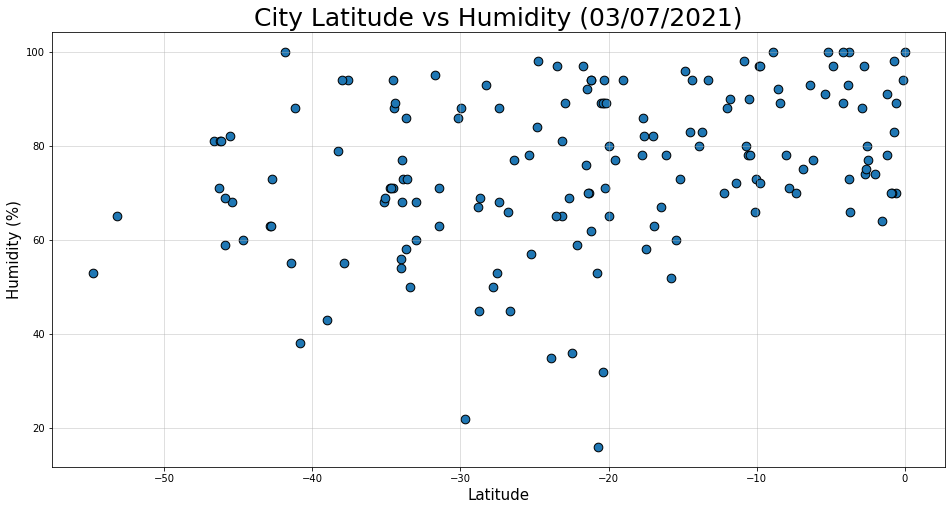

In [71]:
x_values = SHemisphere['Lat']
y_values = SHemisphere['Humidity']
plt.figure(figsize=(16,8))
plt.scatter(x_values,y_values, edgecolors='black', s=75)
plt.xlabel('Latitude', size=15)
plt.ylabel('Humidity (%)', size=15)
plt.title('City Latitude vs Humidity (03/07/2021)', size=25)
plt.grid(b=True, alpha=.5)
plt.show()

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

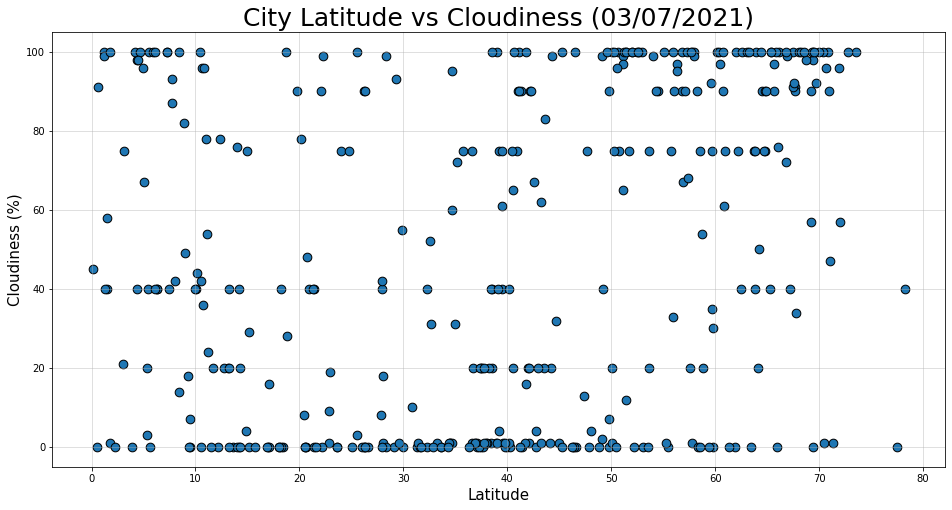

In [72]:
x_values = NHemisphere['Lat']
y_values = NHemisphere['Cloudiness']
plt.figure(figsize=(16,8))
plt.scatter(x_values,y_values, edgecolors='black', s=75)
plt.xlabel('Latitude', size=15)
plt.ylabel('Cloudiness (%)', size=15)
plt.title('City Latitude vs Cloudiness (03/07/2021)', size=25)
plt.grid(b=True, alpha=.5)
plt.show()

### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

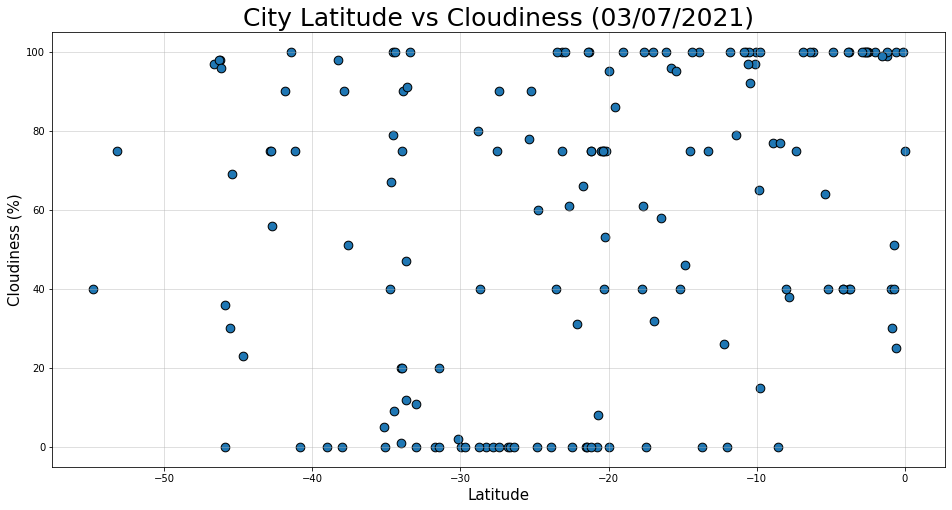

In [74]:
x_values = SHemisphere['Lat']
y_values = SHemisphere['Cloudiness']
plt.figure(figsize=(16,8))
plt.scatter(x_values,y_values, edgecolors='black', s=75)
plt.xlabel('Latitude', size=15)
plt.ylabel('Cloudiness (%)', size=15)
plt.title('City Latitude vs Cloudiness (03/07/2021)', size=25)
plt.grid(b=True, alpha=.5)
plt.show()

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

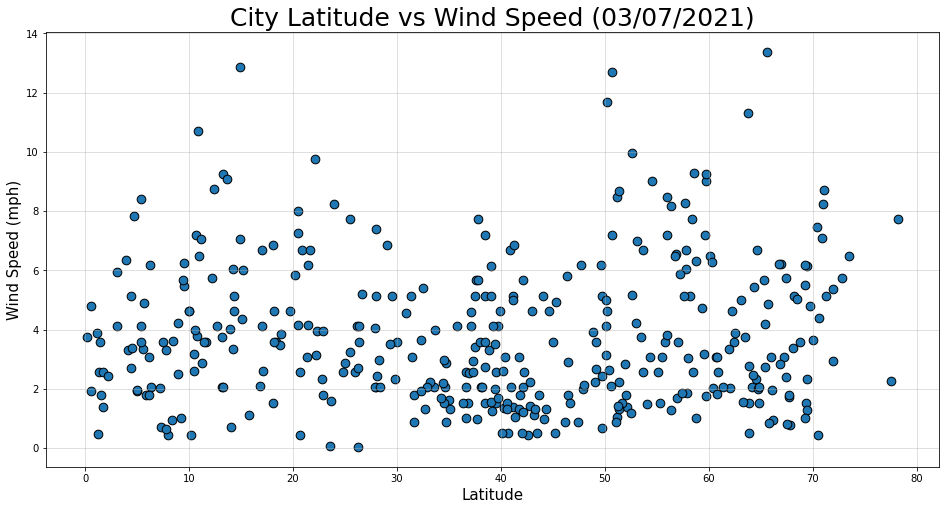

In [75]:
x_values = NHemisphere['Lat']
y_values = NHemisphere['Wind Speed']
plt.figure(figsize=(16,8))
plt.scatter(x_values,y_values, edgecolors='black', s=75)
plt.xlabel('Latitude', size=15)
plt.ylabel('Wind Speed (mph)', size=15)
plt.title('City Latitude vs Wind Speed (03/07/2021)', size=25)
plt.grid(b=True, alpha=.5)
plt.show()

### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

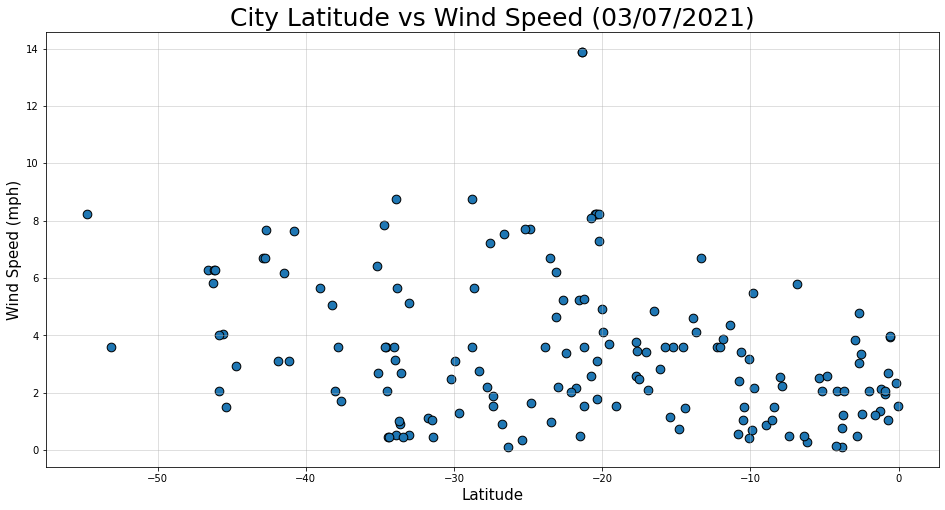

In [82]:
x_values = SHemisphere['Lat']
y_values = SHemisphere['Wind Speed']
plt.figure(figsize=(16,8))
plt.scatter(x_values,y_values, edgecolors='black', s=75)
plt.xlabel('Latitude', size=15)
plt.ylabel('Wind Speed (mph)', size=15)
plt.title('City Latitude vs Wind Speed (03/07/2021)', size=25)
plt.grid(b=True, alpha=.5)
plt.show()